In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


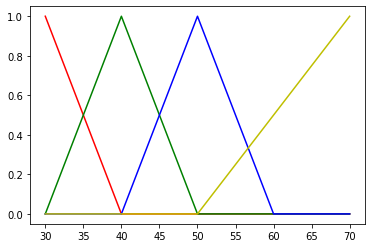

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(30,71,1)
slow=fuzzy.trimf(x,[30,30,40])
medium=fuzzy.trimf(x,[30,40,50])
medium_fast=fuzzy.trimf(x,[40,50,60])
full_speed=fuzzy.trimf(x,[50,70,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'y',linewidth=1.5, label='FULL_SPEED')

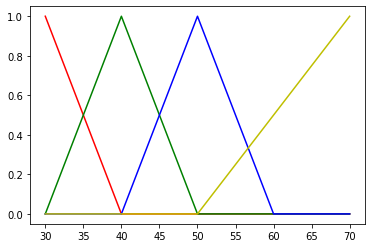

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(30,71,1)
slow=fuzzy.trapmf(x,[30,30,30,40])
medium=fuzzy.trapmf(x,[30,40,40,50])
medium_fast=fuzzy.trapmf(x,[40,50,50,60])
full_speed=fuzzy.trapmf(x,[50,70,70,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'y',linewidth=1.5, label='FULL_SPEED')

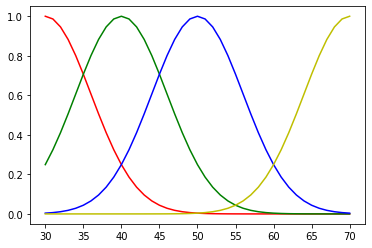

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(30,71,1)
slow=fuzzy.gaussmf(x,30,6)
medium=fuzzy.gaussmf(x,40,6)
medium_fast=fuzzy.gaussmf(x,50,6)
full_speed=fuzzy.gaussmf(x,70,6)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'y',linewidth=1.5, label='FULL_SPEED')

20.7536231884058


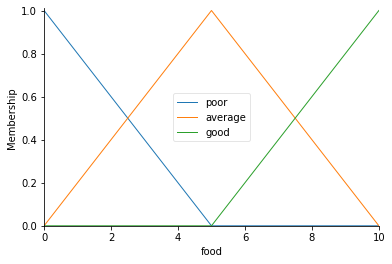

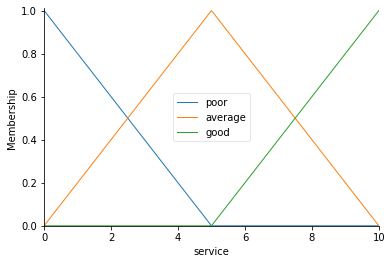

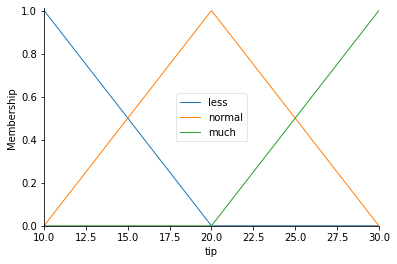

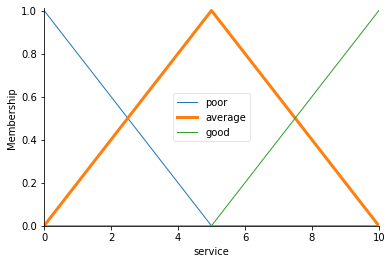

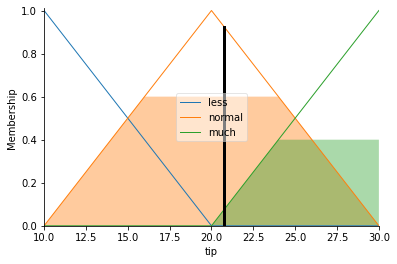

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()
rule1=ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor'] & service['average'], tip['normal'])
rule3=ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4=ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=5
tipping.input['service']=7
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

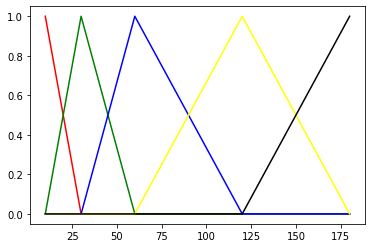

In [ ]:
#Nồi cơm điện
#Input: Time, Rice
#output:%power
#veryfast,fast,normal,slow,veryslow
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(10,181,1)
very_fast=fuzzy.trimf(x,[10,10,30])
fast=fuzzy.trimf(x,[10,30,60])
normal=fuzzy.trimf(x,[30,60,120])
slow=fuzzy.trimf(x,[60,120,180])
very_slow=fuzzy.trimf(x,[120,180,180])
plt.figure()
plt.plot(x,very_fast,'red',linewidth=1.5, label='VERY_FAST')
plt.plot(x,fast,'green',linewidth=1.5, label='FAST')
plt.plot(x,normal,'blue',linewidth=1.5, label='NORMAL')
plt.plot(x,slow,'yellow',linewidth=1.5, label='SLOW')
plt.plot(x,very_slow,'black',linewidth=1.5, label='VERY_SLOW')


39.24652166505767


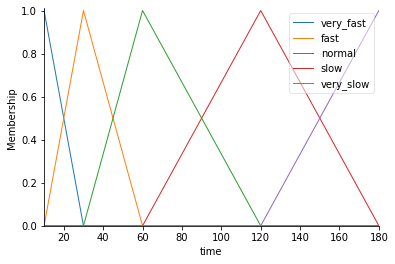

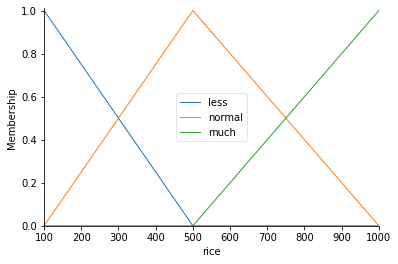

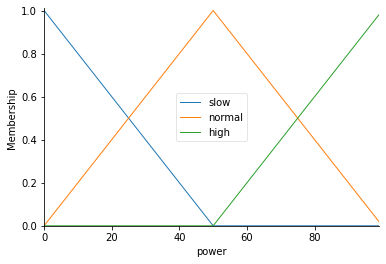

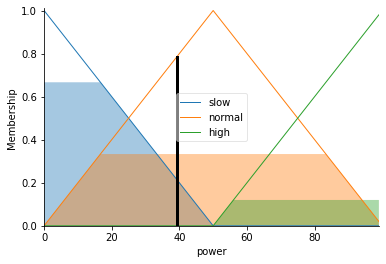

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,181,1),'time')
rice=ctrl.Antecedent(np.arange(100,1001,1),'rice')
power=ctrl.Consequent(np.arange(0,100,1),'power')
time['very_fast']=fuzz.trimf(time.universe,[10,10,30])
time['fast']=fuzz.trimf(time.universe,[10,30,60])
time['normal']=fuzz.trimf(time.universe,[30,60,120])
time['slow']=fuzz.trimf(time.universe,[60,120,180])
time['very_slow']=fuzz.trimf(time.universe,[120,180,180])
rice['less']=fuzz.trimf(rice.universe,[100,100,500])
rice['normal']=fuzz.trimf(rice.universe,[100,500,1000])
rice['much']=fuzz.trimf(rice.universe,[500,1000,1000])
power['slow']=fuzz.trimf(power.universe,[0,0,50])
power['normal']=fuzz.trimf(power.universe,[0,50,100])
power['high']=fuzz.trimf(power.universe,[50,100,100])
time.view()
rice.view()
power.view()
rule1=ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule2=ctrl.Rule(time['very_fast'] & rice['normal'], power['high'])
rule3=ctrl.Rule(time['very_fast'] & rice['less'], power['high'])
rule4=ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule5=ctrl.Rule(time['fast'] & rice['normal'], power['high'])
rule6=ctrl.Rule(time['fast'] & rice['less'], power['normal'])
rule7=ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule8=ctrl.Rule(time['normal'] & rice['normal'], power['normal'])
rule9=ctrl.Rule(time['normal'] & rice['less'], power['slow'])
rule10=ctrl.Rule(time['slow'] & rice['much'], power['normal'])
rule11=ctrl.Rule(time['slow'] & rice['normal'], power['slow'])
rule12=ctrl.Rule(time['slow'] & rice['less'], power['slow'])
rule13=ctrl.Rule(time['very_slow'] & rice['much'], power['slow'])
rule14=ctrl.Rule(time['very_slow'] & rice['normal'], power['slow'])
rule15=ctrl.Rule(time['very_slow'] & rice['less'], power['slow'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=100
tipping.input['rice']=560
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)